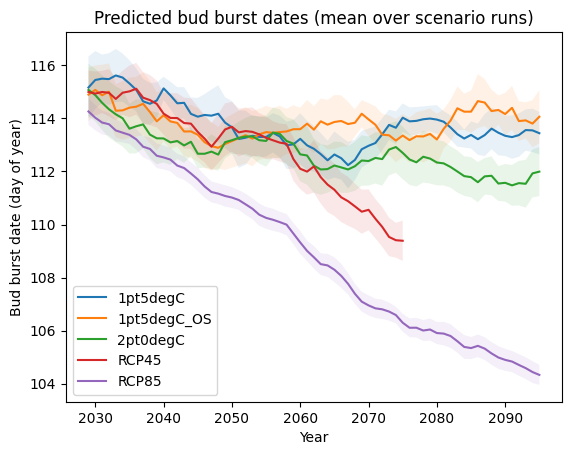

In [3]:
# visualize-veluwe-output
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import norm

df = pd.read_csv(forecasting_all_file)

df = df.groupby(['year', 'scenario_name']).agg(
    mean=('mean_pred_bb_window', 'mean'),
    sd=('mean_pred_bb_window', 'std'),
    error=('mean_pred_bb_window', lambda x: (norm.ppf(0.95) * np.std(x))/np.sqrt(len(x))),
    )
df['CI_lower'] = df['mean'] - df['error']
df['CI_upper'] = df['mean'] + df['error']

df = df.unstack()

plt.clf()
for scenario in df['mean'].columns:
    plt.plot(
        df.index,
        df['mean'][scenario],
        label=scenario,
    )        
    plt.fill_between(
        df.index,
        df['CI_lower'][scenario],
        df['CI_upper'][scenario],
        alpha=.1,
    )
plt.xlabel('Year')
plt.ylabel('Bud burst date (day of year)')
plt.title('Predicted bud burst dates (mean over scenario runs)')
plt.legend()